## 1. Трансляция Суперкубка по ТВ: исследование аудитории.

Датасет состоит из трех CSV-файлов: один с игровыми данными, один с телевизионными данными и один с данными о музыкантах, выступавших в перерывах, для всех 52 Суперкубков.
После небольшого изучения и очистки наших данных ответим на следующие вопросы:

- Каковы самые экстремальные результаты игры?
- Как игра влияет на телезрителей?
- Как со временем менялись зрительская аудитория, телевизионные рейтинги и стоимость рекламы?
- Кто самые успешные музыканты с точки зрения выступлений в перерыве?

In [12]:
import pandas as pd

game = pd.read_csv('bowls.csv')
tv = pd.read_csv('tv.csv')
music = pd.read_csv('musicians.csv')

display(game.head())
display(tv.head())
display(music.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


Проверка вывода .info() для датафреймов tv и music показывает нам, что существует несколько столбцов с нулевыми значениями.

In [10]:
tv.info()
print('\n')
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

## 2. Комбинированное распределение очков

Для телевизионных данных следующие столбцы имеют множество пропущенных значений:
- total_us_viewers
- rating_18_49
- share_18_49

Что касается данных о музыкантах, то примерно в трети выступлений отсутствует количество исполненных песен (num_songs). Существует множество потенциальных причин для этих пропущенных значений. 
Начнем с рассмотрения комбинированных точек для каждого Суперкубка, визуализируя распределение. Также определим Суперкубки с самыми высокими и самыми низкими баллами.

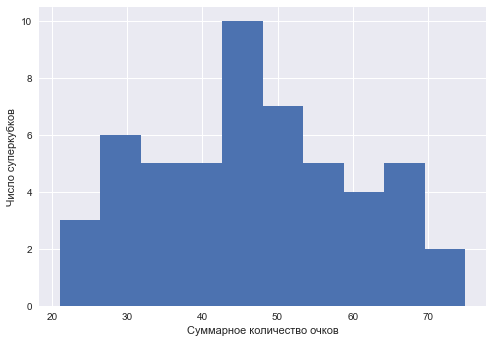

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [14]:
from matplotlib import pyplot as plt

plt.style.use('seaborn')

# Гистограмма распределения суммарного числа очков в Суперкубке по количеству Суперкубков
plt.hist(game.combined_pts)
plt.xlabel('Суммарное количество очков')
plt.ylabel('Число суперкубков')
plt.show()

# Суперкубки с самым высоким и самым низким числом очков
display(game[game['combined_pts'] > 70])
display(game[game['combined_pts'] < 25])

## 3.  Распределение общего числа очков

В большинстве Суперкубков набирают около 40-50 очков, причем крайние точки находятся примерно на равном расстоянии от среднего значения, в трёх самые нерезультативных играх было набрано 21, 22 и 23 очка, в двух самых результативных - 74 и 75.
Рассмотрим теперь разность очков между командами в играх.

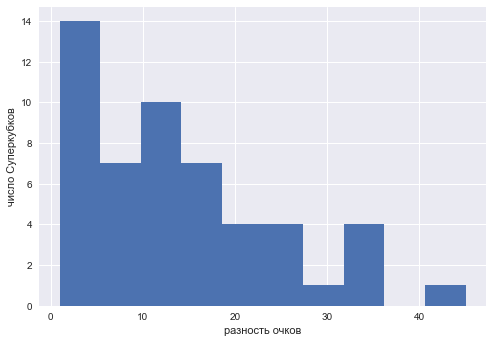

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [17]:
# Гистограмма разности очков
plt.hist(game.difference_pts)
plt.xlabel('разность очков')
plt.ylabel('число Суперкубков')
plt.show()

# Отобразим игры с минимальной разностью и самые большие разбросы
display(game[game["difference_pts"]==1])
display(game[game["difference_pts"]>=35])

## 4. Приводит ли разность в очках к потере зрителей?

В подавляющем большинстве Суперкубков наблюдается близкая к среднему разность очков. Объединим игровые данные и данные с телевидения, чтобы увидеть, является ли это универсальным явлением. Приводят ли большие различия в очках к потере зрителей? Сравним доли домохозяйств (средний процент американских домохозяйств с телевизором, которые смотрели всю трансляцию) с разностью очков, чтобы выяснить это.

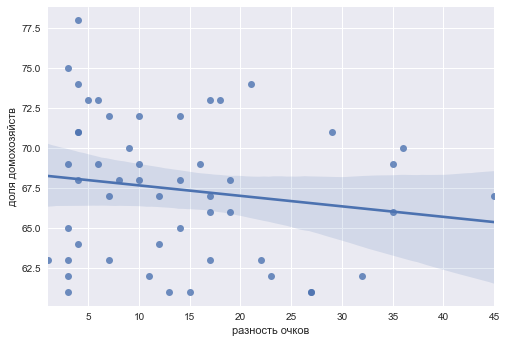

In [22]:
# Cоединим игровые и телевизионные датафреймы
games = pd.merge(tv[tv['super_bowl'] > 1], game, on = 'super_bowl')
import seaborn as sns

# Построим точечную диаграмму с применением модели линейной регрессии
ax = sns.regplot(x="difference_pts", y="share_household", data=games)
ax.set_xlabel('разность очков')
ax.set_ylabel('доля домохозяйств')

## 5. Изменение аудитории и рекламы с течением времени

Нисходящая наклонная линия регрессии и 95% доверительный интервал для этой регрессии предполагают, что отказ от просмотра, если это прорыв, является обычным явлением. Хотя это соответствует здравому смыслу, мы не можем принять эту гипотезу, потому что линейная связь в данных слаба из-за малого размера выборки - 52 игры.

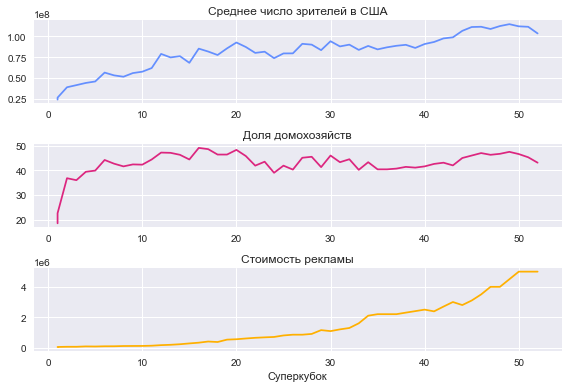

In [24]:
# Изобразим три графика:
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF')
plt.title('Среднее число зрителей в США')

plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F')
plt.title('Доля домохозяйств')

plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000')
plt.title('Стоимость рекламы')
plt.xlabel('Суперкубок')

plt.tight_layout()

## 6. Шоу в перерыве далеко не всегда было идеально

Мы видим, что число зрителей увеличилось раньше, чем расходы на рекламу. Может быть, раньше телесети не разбирались в данных?
Или, возможно, шоу в перерыве были не так хороши в прежние годы? 
Тайм-шоу перед игрой действительно не были впечатляющими, что мы можем увидеть, фильтруя данные  из music.

In [26]:
music[music.super_bowl <= 27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


## 7. Кто выступал чаще всех в перерыве между матчами?
Рассмотрим всех музыкантов, которые участвовали в нескольких шоу в перерыве.

In [29]:
# Подсчитаем число выступлений в перерыве для каждого музыканта и отсортируем их в порядке убывания.

shows = music.groupby('musician').count().super_bowl.reset_index()
shows = shows.sort_values('super_bowl', ascending=False)
shows[shows.super_bowl >=2]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


## 8. Кто исполнил большинство песен в перерыве?

Всемирно известный оркестр Грэмблингского государственного университета занимает первое место с шестью выступлениями. Бейонсе, Джастин Тимберлейк, Нелли и Бруно Марс - единственные музыканты после 2000 года с несколькими выступлениями (по два).
Столбец num_songs содержит множество пропущенных значений:
- У духовых оркестров нет многих записей в столбце num_songs.
- Для других артистов нехватка данных начинается с 20-го Суперкубка.

Отфильтруем исполнителей по слову "Marching" и "Spirit". Затем отфильтруем Суперкубки после 20-го, чтобы решить проблему недостающих данных, и посмотрим, у кого больше всего песен.

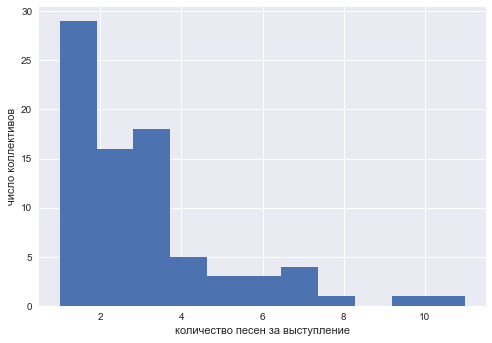

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [37]:
mus = music[~music.musician.str.contains('Marching')]
mus = mus[~mus.musician.str.contains('Spirit')]

# Гистограмма количества песен за выступление
most_songs = int(max(mus['num_songs'].values))
plt.hist(mus.num_songs.dropna(), bins=most_songs)
plt.xlabel('количество песен за выступление')
plt.ylabel('число коллективов')
plt.show()
# Отсортируем музыкантов по количеству песен за выступление и выведем 15 первых
mus = mus.sort_values('num_songs', ascending=False)
display(mus.head(15))

## 9. Вывод

Большинство музыкантов исполняют по 1-3 песни за перерыв. Важно отметить, что продолжительность шоу в перерыве фиксирована (примерно 12 минут), поэтому количество песен за выступление - это скорее показатель того, сколько у исполнителя хитов.
В этом исследовании были изучены данные о матчах Суперкубка, телевидении и шоу в перерыве. Была сделана визуализация распределения общих очков, разности очков и результатов шоу в перерыве с помощью гистограмм. С помощью линейных графиков можно увидеть, как рост стоимости рекламы отстает от роста аудитории. Была обнаружена возможная связь больших разбросов в очках между командами с падением числа зрителей.